In [1]:
''' Project 1: Global Music Mood Map 🎶

This notebook explores Spotify’s top songs by country, using audio features
(cellvalence = happiness, energy = intensity, danceability = movement).  

Goal is Compare average moods of top songs across different countries.  '''

' Project 1: Global Music Mood Map 🎶\n\nThis notebook explores Spotify’s top songs by country, using audio features\n(cellvalence = happiness, energy = intensity, danceability = movement).  \n\nGoal is Compare average moods of top songs across different countries.  '

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 

In [3]:
FILE_PATH = "/Users/pranjalganvir/Documents/GitHub/spotify-virality-project/data/universal_top_spotify_songs.csv"
df = pd.read_csv(FILE_PATH)
df.head()

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,2RkZ5LkEzeHGRsmDqKwmaJ,Ordinary,Alex Warren,1,1,0,NaN,2025-06-11,95,False,...,2,-6.141,1,0.0600,0.704000,0.000007,0.0550,0.391,168.115,3
1,42UBPzRMh5yyz0EDPr6fr1,Manchild,Sabrina Carpenter,2,-1,48,NaN,2025-06-11,89,True,...,7,-5.087,1,0.0572,0.122000,0.000000,0.3170,0.811,123.010,4
2,0FTmksd2dxiE5e3rWyJXs6,back to friends,sombr,3,0,1,NaN,2025-06-11,98,False,...,1,-2.291,1,0.0301,0.000094,0.000088,0.0929,0.235,92.855,4
3,7so0lgd0zP2Sbgs2d7a1SZ,Die With A Smile,"Lady Gaga, Bruno Mars",4,0,-1,NaN,2025-06-11,91,False,...,6,-7.727,0,0.0317,0.289000,0.000000,0.1260,0.498,157.964,3
4,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,5,1,0,NaN,2025-06-11,100,False,...,2,-10.171,1,0.0358,0.200000,0.060800,0.1170,0.438,104.978,4


In [ ]:
# Keeping country, valence, energy, danceability, name for the mood  
df = df[[
    "name","country", "valence", "energy",
    "danceability"
]]

# drops the rows where val is NaN
df = df.dropna(subset=[
    "name","country", "valence", "energy",
    "danceability"
])

for i in ["valence", "energy", "danceability"]:
    df = df[(df[i] >= 0) & (df[i] <= 1)]

df

,name,country,valence,energy,danceability
50,Isaka (6am),ZA,0.752,0.540,0.341
51,Uzizwa Kanjan (feat. GL_Ceejay),ZA,0.560,0.431,0.510
52,Mali,ZA,0.291,0.538,0.807
53,"Abantwana Bakho (feat. Thatohatsi, Young Stunn...",ZA,0.542,0.747,0.740
54,Vuka (feat. Thukuthela),ZA,0.524,0.455,0.738
...,...,...,...,...,...
2110311,Slime You Out (feat. SZA),AE,0.105,0.408,0.483
2110312,SAY MY GRACE (feat. Travis Scott),AE,0.476,0.635,0.773
2110313,People,AE,0.693,0.422,0.573
2110314,Rainy Days,AE,0.282,0.454,0.633


In [5]:
print("Top 10 countries with track count: ")
print(df["country"].value_counts().head(10))

print("Feature range: ")
df[["energy", "valence", "danceability"]].describe()

Top 10 countries with track count: 
country
DO    29176
IT    29174
NI    29169
PL    29164
HU    29163
HN    29161
CZ    29161
EG    29161
KZ    29161
TH    29161
Name: count, dtype: int64
Feature range: 


,energy,valence,danceability
count,2.081378e+06,2.081378e+06,2.081378e+06
mean,6.491110e-01,5.466485e-01,6.763780e-01
std,1.687521e-01,2.308384e-01,1.437719e-01
min,2.010000e-05,0.000000e+00,0.000000e+00
25%,5.520000e-01,3.700000e-01,5.810000e-01
50%,6.690000e-01,5.480000e-01,7.000000e-01
75%,7.670000e-01,7.330000e-01,7.800000e-01
max,9.980000e-01,9.920000e-01,9.880000e-01


In [6]:
agg = (df.groupby("country").agg(
mean_valence = ("valence" , "mean"),
    mean_energy = ("energy" , "mean"),
    mean_danceability = ("danceability" , "mean"),
    num_of_tracks = ("name", 'count')
).reset_index())

agg = agg[agg["num_of_tracks"] >= 500]
df.shape

(2081378, 5)

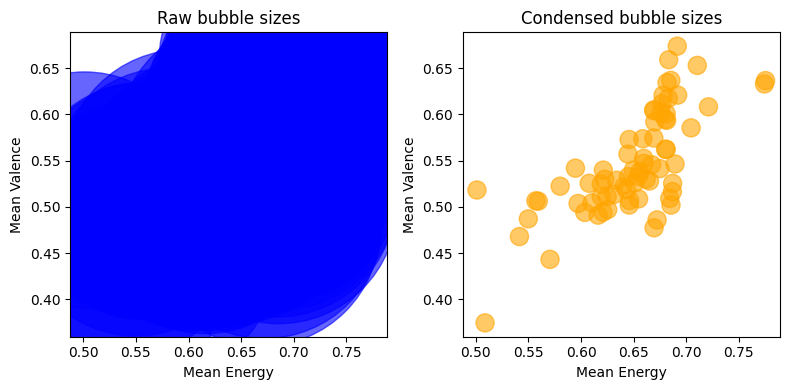

In [7]:

s_raw = agg["num_of_tracks"]
s_condensed = np.sqrt(agg["num_of_tracks"]) * 1 #formula used to compress or else draws a monster 

fig, axes = plt.subplots(1, 2, figsize=(8,4)) 

axes[0].scatter(agg["mean_energy"], agg["mean_valence"], s=s_raw, color="blue", alpha=0.6)
axes[0].set_title("Raw bubble sizes")
axes[0].set_xlabel("Mean Energy")
axes[0].set_ylabel("Mean Valence")


axes[1].scatter(agg["mean_energy"], agg["mean_valence"], s=s_condensed, color="orange", alpha=0.6)
axes[1].set_title("Condensed bubble sizes")
axes[1].set_xlabel("Mean Energy")
axes[1].set_ylabel("Mean Valence")

plt.tight_layout()
plt.savefig("/Users/pranjalganvir/Documents/GitHub/spotify-virality-project/visuals/graph.png")
plt.show()
